# Exploratory Data Analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Load data
airlines = pd.read_csv("airlines.csv")
flights = pd.read_csv("filtered_flights.csv")

In [23]:
# Defining "on time" threshold as 15 minutes
on_time_threshold = 15

# Creating new variables saying whether a flight was delayed on departure and arrival, respectively
flights["dep_on_time"] = (flights["DEPARTURE_DELAY"] <= on_time_threshold).astype(int)
flights["arr_on_time"] = (flights["ARRIVAL_DELAY"] <= on_time_threshold).astype(int)

In [24]:
# Aggregating by airline
summary_performance = (
    flights.groupby("AIRLINE")
      .agg(
          mean_dep_delay=("DEPARTURE_DELAY", "mean"),
          mean_arr_delay=("ARRIVAL_DELAY", "mean"),
          dep_on_time_rate=("dep_on_time", "mean"),
          arr_on_time_rate=("arr_on_time", "mean"),
          n_flights=("AIRLINE", "size")
      )
)

In [25]:
# Showing full airline names instead of abbreviations
summary_performance = summary_performance.merge(
    airlines,
    left_on="AIRLINE",
    right_on="IATA_CODE",
    how="left"
).drop(columns=["IATA_CODE"])

In [26]:
# Sorting the airlines on highest on-time rate, then lowest average delay
summary_performance = summary_performance.sort_values(
    by=["arr_on_time_rate", "dep_on_time_rate", "mean_arr_delay", "mean_dep_delay"],
    ascending=[False, False, True, True]
)

In [36]:
# Showing the ranked airlines in a table
summary_performance[["AIRLINE", "n_flights",
                       "arr_on_time_rate", "dep_on_time_rate",
                       "mean_arr_delay", "mean_dep_delay"]
                       ].rename(columns={"AIRLINE": "Airline",
                                         "n_flights": "Total Flights",
                                         "arr_on_time_rate": "On Time Arrivals (Rate)",
                                         "dep_on_time_rate": "On Time Departures (Rate)",
                                         "mean_arr_delay": "Average Arrival Delay (Minutes)",
                                         "mean_dep_delay": "Average Departure Delay (Minutes)"}
                               ).reset_index(drop=True)

,Airline,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,Alaska Airlines Inc.,33201,0.882,0.905,-0.751,0.593
1,US Airways Inc.,11361,0.857,0.894,2.025,3.224
2,Delta Air Lines Inc.,47603,0.848,0.840,1.884,8.364
3,American Airlines Inc.,65055,0.839,0.853,1.818,7.166
4,United Air Lines Inc.,88315,0.814,0.784,4.235,13.173
5,Virgin America,29651,0.809,0.819,5.751,9.171
6,Skywest Airlines Inc.,134817,0.791,0.804,6.819,8.589
7,JetBlue Airways,20970,0.789,0.790,5.313,10.662
8,Southwest Airlines Co.,196907,0.786,0.769,6.720,11.009
9,Hawaiian Airlines Inc.,4299,0.774,0.921,6.508,3.601


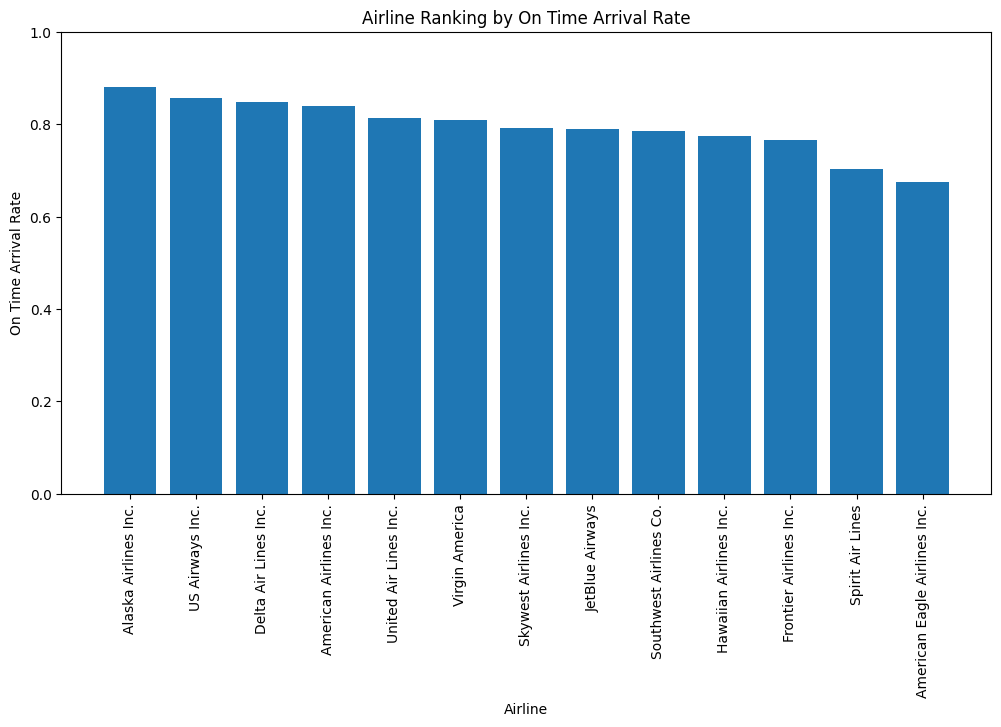

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(summary_performance["AIRLINE"], summary_performance["arr_on_time_rate"])

plt.title("Airline Ranking by On Time Arrival Rate")
plt.xlabel("Airline")
plt.ylabel("On Time Arrival Rate")
plt.xticks(rotation=90)
plt.ylim(0, 1)

plt.show()